In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("Na2SO4.xlsx")

In [3]:
X = data.drop('Sodium Sulphate',axis=1)

In [4]:
Y = data['Sodium Sulphate']

In [5]:
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

In [6]:
Y.shape

(520,)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 4)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0,2))
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [10]:
from sklearn.model_selection import cross_val_score, KFold 

In [11]:
from sklearn.model_selection import KFold, GridSearchCV
kf = KFold(n_splits = 5)
model = SVR()

params = {'svr__C':[0.5, 0.75, 1, 2, 5, 10, 100, 150],
          'svr__kernel':['poly', 'linear', 'rbf'],
          'svr__epsilon':[0.05,0.1, 0.15]
         }

from sklearn.pipeline import Pipeline

mysteps = [ ('svr',SVR(degree = 2))]

my_pipeline = Pipeline(steps = mysteps)

gcv = GridSearchCV(my_pipeline, param_grid = params, cv = kf, scoring = 'neg_mean_absolute_error')

gcv.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('svr', SVR(degree=2))]),
             param_grid={'svr__C': [0.5, 0.75, 1, 2, 5, 10, 100, 150],
                         'svr__epsilon': [0.05, 0.1, 0.15],
                         'svr__kernel': ['poly', 'linear', 'rbf']},
             scoring='neg_mean_absolute_error')

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

kernel = ['linear', 'rbf', 'poly']
C = [5, 10, 500, 800]
gamma = [0.01, 0.1, 1]
epsilon = [0.1, 0.2, 0.5]

param_grid = {
    "kernel": kernel,
    "C": C,
    "gamma": gamma,
    "epsilon": epsilon
}

model = SVR()

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

In [12]:
gcv.best_params_

{'svr__C': 150, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}

In [13]:
gcv.best_score_

-5.68337581240692

In [14]:
best_model = gcv.best_estimator_
best_params = gcv.best_params_

# Make predictions on the test data
y_pred_test = best_model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Print the best parameters
print("Best parameters:", best_params)

Mean Squared Error: 305.819196284173
Best parameters: {'svr__C': 150, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [15]:
print("Best NMAE", gcv.best_score_, "\nBest_Params:",gcv.best_params_)

Best NMAE -5.68337581240692 
Best_Params: {'svr__C': 150, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [16]:
y_pred_train = gcv.predict(x_train)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('Mean Squared Error (MSE) with GridSearchCV:', mse_train)
print('R2 score with GridSearchCV:', r2_train)


Mean Squared Error (MSE) with GridSearchCV: 167.42903424074635
R2 score with GridSearchCV: 0.5066729983786049


In [17]:
y_pred_test = gcv.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print('Mean Squared Error (MSE) with GridSearchCV:', mse_test)
print('R2 score with GridSearchCV:', r2_test)

Mean Squared Error (MSE) with GridSearchCV: 305.819196284173
R2 score with GridSearchCV: 0.26709214056582764


In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Predicted Y')

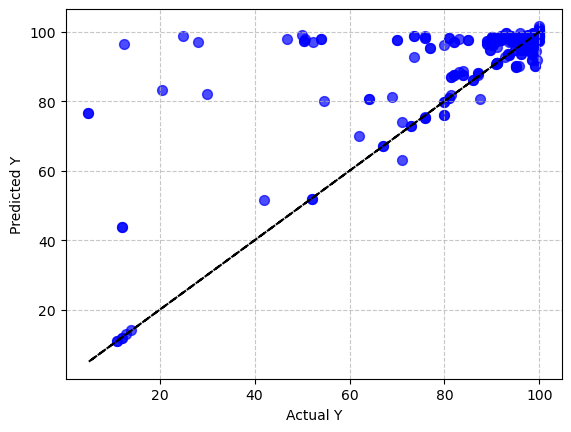

In [19]:
plt.scatter(y_train, y_pred_train, label='Training Data', s=50, c = 'blue', alpha = 0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='black', linestyle ='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

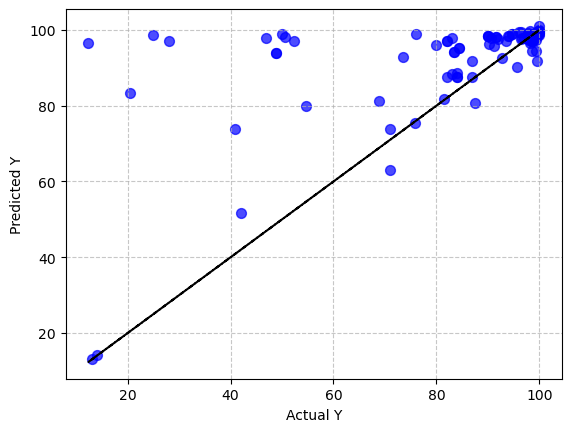

In [20]:
plt.scatter(y_test, y_pred_test, label='Testing Data', s = 50, c = 'blue', alpha=0.7)
plt.plot(y_test, y_test, label = 'Actual Y - Testing', c = 'black', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_rmse_mae(y_true, y_pred):
    """Calculates RMSE and MAE between two arrays using scikit-learn."""
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae


rmse, mae = calculate_rmse_mae(y_train, y_pred_train)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 12.939437168623153
MAE: 5.057931017954434


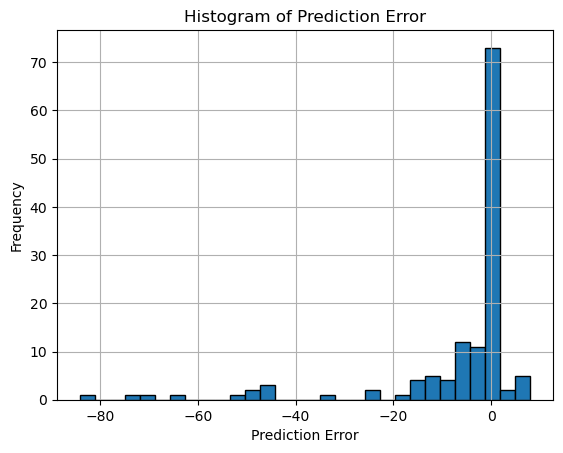

In [23]:
y_pred = gcv.predict(x_test)

# Calculate the prediction error
error = y_test - y_pred

# Draw the histogram of prediction error
plt.hist(error, bins=30,edgecolor='black')
plt.grid(True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Error')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

# Calculate the prediction error
error = y_test - y_pred

# Draw the histogram of prediction error
plt.hist(error, bins=30,edgecolor='black')
plt.grid(True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Error')
plt.show()

In [ ]:

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred_test = best_model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Print the best parameters
print("Best parameters:", best_params)

In [ ]:
print("Best NMAE", grid_search.best_score_, "\nBest_Params:",grid_search.best_params_)

In [ ]:
y_pred_train = best_model.predict(x_train)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('Mean Squared Error (MSE) with GridSearchCV:', mse_train)
print('R2 score with GridSearchCV:', r2_train)


In [ ]:
y_pred_test = best_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print('Mean Squared Error (MSE) with GridSearchCV:', mse_test)
print('R2 score with GridSearchCV:', r2_test)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

In [ ]:
plt.scatter(y_train, y_pred_train, label='Training Data', s=50, c = 'blue', alpha = 0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='black', linestyle ='--')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [ ]:
plt.scatter(y_test, y_pred_test, label='Testing Data', s = 50, c = 'blue', alpha=0.7)
plt.plot(y_test, y_test, label = 'Actual Y - Testing', c = 'black', linestyle='--')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')